Importing basic python libraries



In [1]:
import numpy as np 
import pandas as pd
import itertools    #to return iterators

Importing Dataset and getting basic info about its features

In [2]:
df=pd.read_csv("G:/Desktop/cleanednews.csv")
# dataset needs to be cleaned from entries of irregular format manually.
print(('row,column'),df.shape)
df.head(10)

row,column (6304, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
6,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
7,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
8,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL
9,1357,"With all three Clintons in Iowa, a glimpse at ...","CEDAR RAPIDS, Iowa — “I had one of the most wo...",REAL


In [3]:
print("# total no rows in dataset: "+str(len(df.index)))

# total no rows in dataset: 6304


In [4]:
print(df.columns)

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


In [5]:
labels=df.label
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    REAL
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

Data Cleaning (removing nan values using Seaborn library heatmap and drop function if necessary)

Data visualization of NAN values of data set using Seaborn library Heatmap


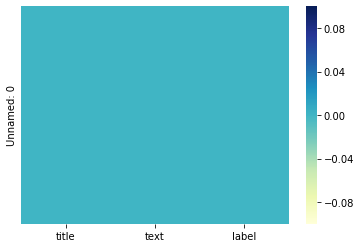

In [16]:
import seaborn as sns
print("Data visualization of NAN values of data set using Seaborn library Heatmap")
sns.heatmap(df.isnull(),yticklabels=False,cmap="YlGnBu")

In [7]:
df.dropna(inplace=True)

Data visualization of NAN values of data set using Seaborn library Heatmap after dropping na values
row,column (6304, 4)


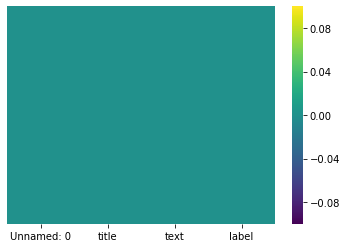

In [8]:
print("Data visualization of NAN values of data set using Seaborn library Heatmap after dropping na values")
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")
print(('row,column'),df.shape)

Converting Unnamed index into a feature

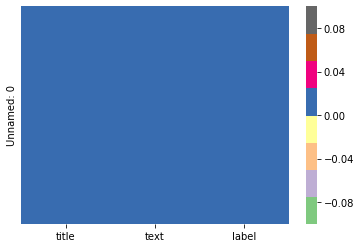

In [9]:
# Set index 
df = df.set_index("Unnamed: 0")

# Print first lines of `df` 
df.head()

y = df.label 

# Drop the `label` column
df.drop("label", axis=1)

sns.heatmap(df.isnull(),yticklabels=False,cmap="Accent")
#df.head(10)


Importing Machine learning libraries

In [10]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  #import the vectorizer
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix  #for finding the accuracy and the confusion matrix

Train - Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.2, random_state=7)

Build TFID_Vectorizer to transform train-test dataset to vectors

In [12]:
t_vec=TfidfVectorizer(stop_words='english', max_df=0.7)
t_train=t_vec.fit_transform(X_train) 
t_test=t_vec.transform(X_test)

Building PassiveAggresive Classifier and predicting accuracy at max iteration value

In [13]:
score=[0]*101
for max_iter in range (1,101):
 pac=PassiveAggressiveClassifier(max_iter)
 pac.fit(t_train,y_train)
 
 y_pred=pac.predict(t_test)
 score[max_iter]=accuracy_score(y_test,y_pred)
 
 print(f'Accuracy: {round(score[max_iter]*100,2)}%')

print("  ")
print("The highest value of accuracy is at max-iter of value " ,end=" ")
print(score.index(max(score))) #print the value of iter where value is max
print('ACCURACY IS ',end="")
print(round(max(score)*100),end=" %")#

Accuracy: 93.34%
Accuracy: 93.1%
Accuracy: 93.26%
Accuracy: 92.94%
Accuracy: 93.34%
Accuracy: 93.74%
Accuracy: 93.58%
Accuracy: 92.7%
Accuracy: 93.26%
Accuracy: 93.5%
Accuracy: 93.02%
Accuracy: 93.1%
Accuracy: 92.94%
Accuracy: 93.58%
Accuracy: 93.34%
Accuracy: 93.58%
Accuracy: 93.5%
Accuracy: 93.1%
Accuracy: 93.58%
Accuracy: 93.26%
Accuracy: 93.26%
Accuracy: 93.26%
Accuracy: 93.1%
Accuracy: 92.86%
Accuracy: 92.86%
Accuracy: 93.66%
Accuracy: 93.34%
Accuracy: 92.94%
Accuracy: 93.18%
Accuracy: 93.02%
Accuracy: 93.34%
Accuracy: 92.78%
Accuracy: 93.18%
Accuracy: 93.02%
Accuracy: 93.34%
Accuracy: 93.5%
Accuracy: 93.02%
Accuracy: 93.58%
Accuracy: 93.26%
Accuracy: 93.18%
Accuracy: 93.26%
Accuracy: 93.34%
Accuracy: 92.94%
Accuracy: 93.5%
Accuracy: 93.42%
Accuracy: 93.18%
Accuracy: 93.5%
Accuracy: 93.5%
Accuracy: 93.02%
Accuracy: 93.42%
Accuracy: 93.02%
Accuracy: 93.02%
Accuracy: 93.18%
Accuracy: 92.78%
Accuracy: 93.02%
Accuracy: 93.34%
Accuracy: 93.02%
Accuracy: 93.26%
Accuracy: 92.94%
Accuracy

Confusion matrix for predictions

In [14]:
m=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
m

array([[585,  42],
       [ 41, 593]], dtype=int64)

Confusion matrix visualization using matlab and seaborn libraries

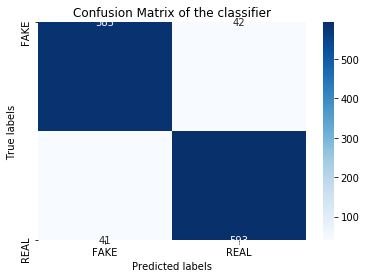

<Figure size 1080x1080 with 0 Axes>

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

ax=plt.subplot()

sns.heatmap(m ,annot=True,ax = ax,fmt='g',cmap='Blues') 
 #cmap = blue will set the color 
 #fmt is used to pass value as string
plt.figure(figsize=(15,15))  #size of figure

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['FAKE', 'REAL'])
ax.yaxis.set_ticklabels(['FAKE', 'REAL'])

ax.set_title('Confusion Matrix of the classifier') #title 
print(" ")